In [14]:
##importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
# Load in the data
df = pd.read_csv("D:\\databases\\PYTHON\\30_DAYS_OF_PYTHON\\insurance\\insurance.csv")

<AxesSubplot:>

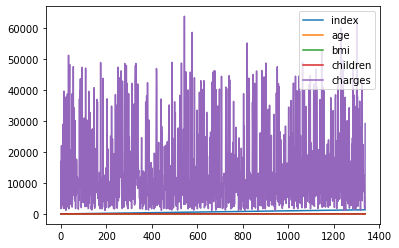

In [4]:
# Select numeric columns
num_cols = df.select_dtypes(include=['float64','int64'])
num_cols.plot()

In [5]:
# Plot Correlation Matrix
print(round(num_cols.corr(), 2))

          index   age   bmi  children  charges
index      1.00 -0.03 -0.04      0.03    -0.00
age       -0.03  1.00  0.11      0.04     0.30
bmi       -0.04  0.11  1.00      0.01     0.20
children   0.03  0.04  0.01      1.00     0.07
charges   -0.00  0.30  0.20      0.07     1.00


In [6]:
# Create smoker, sex and region factors
df['smoker'] = df['smoker'].astype('category')
df['sex'] = df['sex'].astype('category')
df['region'] = df['region'].astype('category')

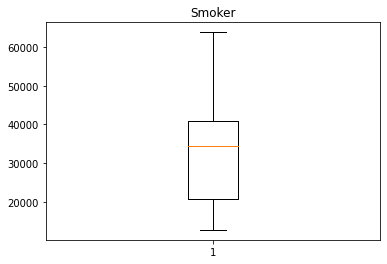

In [7]:
# Create boxplots
plt.figure()
plt.title("Smoker")
plt.boxplot(df.charges[df.smoker == 'yes'])
plt.show()

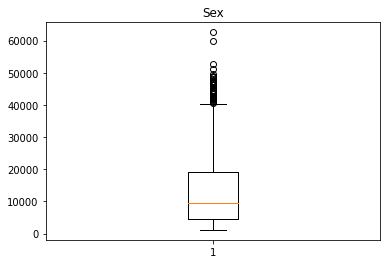

In [8]:
plt.figure()
plt.title("Sex")
plt.boxplot(df.charges[df.sex == 'male'])
plt.show()

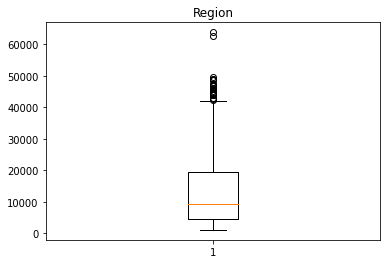

In [9]:
plt.figure()
plt.title("Region")
plt.boxplot(df.charges[df.region == 'southeast'])
plt.show()

In [15]:
# Creating Linear Regression Model
import statsmodels.formula.api as smf

In [21]:
# fitting the model
model1 = smf.ols(formula = 'charges ~ '+ \
                 ' + '.join(df.columns.difference(['charges'])), data = df).fit()

In [22]:
# print summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     444.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:44:54   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1328   BIC:                         2.717e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.209e+04   1